In [0]:
# import the necessary packages
import numpy as np
from urllib.request import urlopen
import cv2
from matplotlib import pyplot as plt

# METHOD #1: OpenCV, NumPy, and urllib
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
image = url_to_image("https://fontsarena-cd5e.kxcdn.com/wp-content/uploads/2019/04/helvetica-now-font-400x364.png")

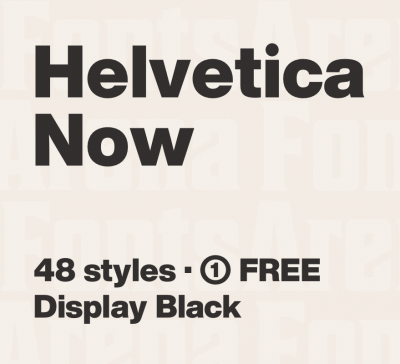

In [5]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)

In [0]:
edges = cv2.Canny(image,100,200)

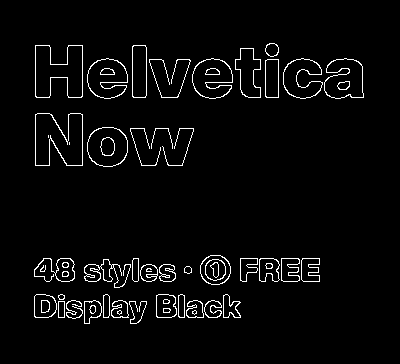

In [7]:
cv2_imshow(edges)

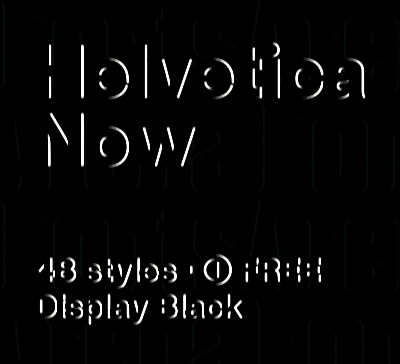

In [8]:
#kernel = np.ones((3,3),np.float32)/25
kernel = np.float32([[-1,0,1],[-1,0,1],[-1,0,1]])

dst = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Horizontal Edge Detector

Horizontal edge detection kernel detects (or returns) all the horizontal edges of an image. Basically in this operation, we shall have a kernel which convolves over the image and returns the horizontal edges of image.

To view this operation on other way, 'kernel' is also an image, small image; which convolves over target image and if there is any co-relation between small image and target image, it returns an high value; else low value.

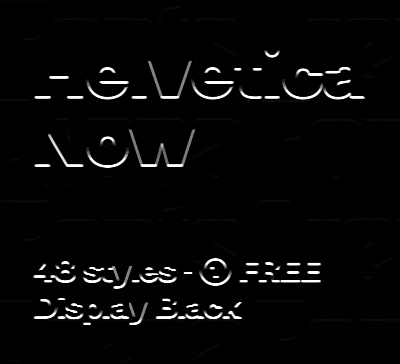

In [12]:
kernel = np.float32([[-1,-1,-1],[0,0,0],[1,1,1]])
dst    = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Horizontal Edge Detector - Lets try some new Kernel!

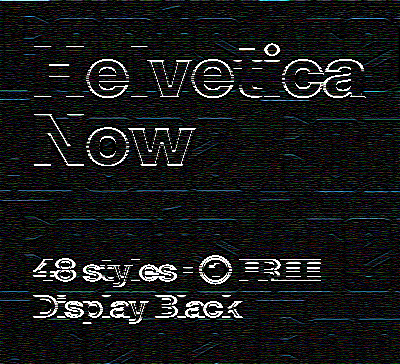

In [24]:
kernel = np.float32([[15,15,15],
                     [-30,-30,-30],
                     [15,15,15]])
dst    = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Some backround is also visible!! Not able to guess what is that!

# 45 Degree Detector

Let us have 5x5 Kernel! Why? Larger the kernel, better the core-relation! Better the identification!

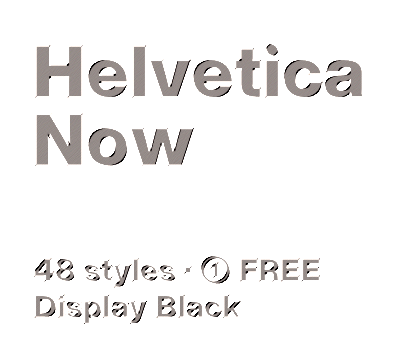

In [41]:
kernel = np.float32([[-1,-1, 3],
                     [-1, 3,-1],
                     [ 3,-1,-1]])
dst    = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Blur Kernel

Blur Kernel is one of the simplest one.. Afterall we want to vanish out the sharp kernels! Easiest one? Average filter!!!!

And let us say you want to have control over blur.. So what to do? Just adjust blur_par and check!

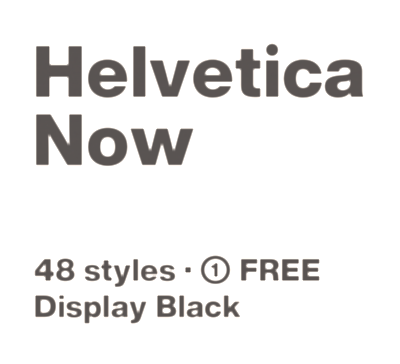

In [37]:
blur_par = 5

kernel = np.multiply((1/blur_par), np.float32([[1,1,1],
                                         [1,1,1],
                                         [1,1,1]]))
dst    = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Sharpen Kernel

What is ideal shape kernel? Remove gradient of lines and keep only those points which are having heighest intensity

More that image, check the background

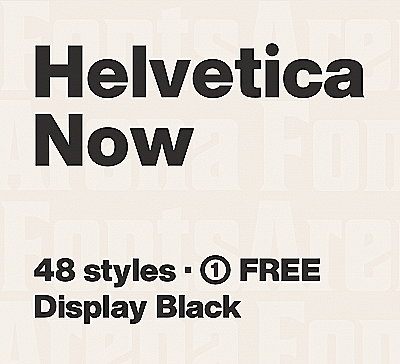

In [46]:
kernel = np.float32([[ 0,-1, 0],
                     [-1, 5,-1],
                     [ 0,-1, 0]])
dst    = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)

# Identity Kernel

Okay.. We should do convolution but still center pixel should be same as previous.. 
How it is possible??
Easy, multiply every other pixel by 0 and center one by 1 

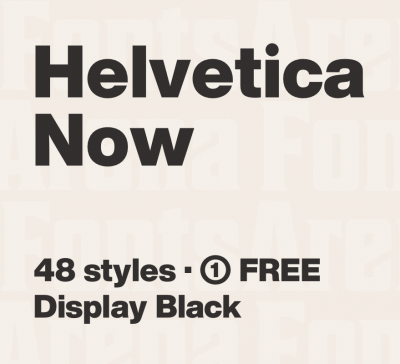

In [47]:
kernel = np.float32([[ 0, 0, 0],
                     [ 0, 1, 0],
                     [ 0, 0, 0]])
dst    = cv2.filter2D(image,-1,kernel)
cv2_imshow(dst)